# E7 - Task

In [5]:
reset -f

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Harmonic Model

The following content is adapted from:
* Robert D. Blevins (1994) Flow-induced Vibrations. vol. 2, Krieger Publishing Comnpany. isbn: [9780894648236](https://books.google.de/books/about/Flow_induced_Vibration.html?id=oViRmgEACAAJ&redir_esc=y)
* see Section 3.5.1
* dof = 1 -> veritcal displacement
* Damping force of type Stoke (viscous damper for small velocities)

## Define symbolic variables

* $\rho$ - fluid density
* $u$ - free stream velocity
* $D$ - cylinder diameter
* $C_L$ - lift coefficient (dimensionless)
* $\omega_s$ - $2\cdot \pi \cdot f_s$ circular cortex shedding frequency
* $t$ - time
* $F_L$ - lift force (force perpendicular to the mean flow) per unit length of cylinder
* $y$ - displacment of the cylinder in vertical direction
* $m$ - mass 
* $\zeta$ - structural daming factor
* $k$ - spring constant
* $\omega_y$ - $2\cdot \pi \cdot f_y$ circular natural frequency of the cylinder
* $c$ - damping coefficient

In [7]:
rho, u, D, CL, ws, t, m, zeta, k, wy, c = sp.symbols('rho, u, D, C_L, omega_s, t, m, zeta, k, omega_y, c', real = 'True')
y = sp.Function('y')

In [8]:
FL = 1/2*rho*u**2*D*CL*sp.sin(ws*t)
display(FL)

0.5*C_L*D*rho*u**2*sin(omega_s*t)

## Equation of motion
using Lagrange's equation of second kind

### Kinetic Energy

In [9]:
T = m/2*sp.diff(y(t),t)**2

### Potential Energy

In [10]:
U = 1/2*k/2*y(t)**2 + 1/2*k/2*y(t)**2

### Dissipation Function

In [11]:
d = 1/2*c/2*sp.diff(y(t),t)**2 + 1/2*c/2*sp.diff(y(t),t)**2

### General Force

In [12]:
F = FL*y(t)

### Lagrangian

In [13]:
L = T - U

### Equation of motion
$\left(\frac{\partial L}{\partial \dot{q}(t)} \right)^{\cdot} - \frac{\partial L}{\partial q(t)} = - \frac{\partial d}{\partial \dot{q}(t)} + F \frac{\partial r_F}{\partial q(t)}$

In [14]:
EqMo = sp.Eq(sp.diff(sp.diff(L, sp.diff(y(t),t)),t) - sp.diff(L, y(t)) +  sp.diff(d, sp.diff(y(t),t)),sp.diff(F,y(t)))
display(EqMo.simplify())

Eq(0.5*C_L*D*rho*u**2*sin(omega_s*t), 1.0*c*Derivative(y(t), t) + 1.0*k*y(t) + 1.0*m*Derivative(y(t), (t, 2)))

In [15]:
sol = sp.dsolve(EqMo, ics = {y(0): 0, sp.diff(y(t),t).subs(t, 0):0})

In [28]:
mass = (7850*sp.pi * 0.005**2/4*0.2).evalf()
fun = sol.rhs.subs([(m, mass), (CL, 0.01), (D, 0.005), (rho, 1.2), (k, 10), (c, 0.001), (ws, 3), (u, 5)])
fun = fun.as_real_imag()[0]
fun = sp.lambdify(t, fun, 'numpy')
t_vec = np.linspace(0,10,1000)

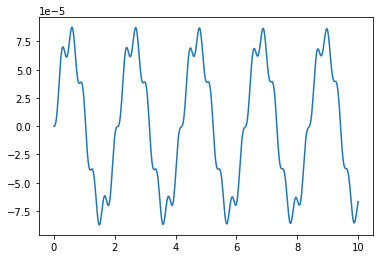

In [29]:
plt.plot(t_vec, fun(t_vec))

## FFT to find the natural frequencies

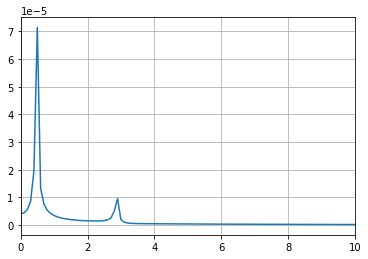

In [54]:
# adapted from https://docs.scipy.org/doc/scipy/tutorial/fft.html

from scipy.fft import fft, fftfreq
# Number of sample points
N = 1000
# sample spacing
T = t_vec[1] - t_vec[0]
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(fun(t_vec))
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim([0,10])
plt.show()

### Check fft results

* using: 
    * $ \omega_y = \sqrt{\frac{k}{m}} = 2\cdot\pi \cdot f_y $ 
    * $\omega_s = 2 \cdot \pi \cdot f_s$

In [43]:
fs = (3/(2*sp.pi)).evalf()
display(fs)

0.477464829275686

In [51]:
fy = ((10/mass)**(0.5) / (2*sp.pi)).evalf()
display(fy)

2.86652253574761